# OpenClassrooms - parcours Data Analyst Business Intelligence - P8

# Milestone 1 - Analyse des données

Dans cette partie nous allons analyser le jeu de données que nous avons à notre disposition. Notre objectif est de comprendre les relations entre les variables, et surtout, celles qui influent sur le prix des transactions immobilières. Grâce à ce travail, nous pourrons ne conserver que les variables qui seront utiles à l'apprentissage de notre algorithme.

## 1.Type des données

La première étape à réaliser est d'importer les données dans le notebook et d'opérer des transformations sur les variables si celles-ci s'imposent (exemple : nettoyage ou changement de type des variables, etc.).

In [ ]:
#On importe les librairies que nous utiliserons pour traiter les données et les visualiser
import pandas as pd
import numpy as np
import matplotlib as plt
# N'oubliez pas d'avoir installé les librairies pandas, numpy et matplotlib via la commande pip

In [ ]:
#On importe les données dans un dataframe
from google.colab import drive
drive.mount("/gdrive")

Mounted at /gdrive


In [ ]:
import os
os.listdir("/gdrive/MyDrive/Colab_notebooks/P8_Analyse_evolution_prix_python")

['portefeuille_actifs1.xlsx',
 'historique_immobilier_paris_2017_2021_vdef2.xlsx',
 'echantillon.xlsx',
 'P8_cours1.ipynb',
 'portefeuille_actifs.xlsx',
 'echantillon_a_classer_solution.xlsx',
 'Modèle+de+présentation+Les+plus+beaux+logis+de+Paris.pptx',
 'BIA_P8_Student_Version.ipynb']

In [ ]:
df_immo=pd.read_excel("/gdrive/MyDrive/Colab_notebooks/P8_Analyse_evolution_prix_python/historique_immobilier_paris_2017_2021_vdef2.xlsx")

Attention, si l'opération ci-dessus ne marche pas, il se peut que le package "openpyxl" ne soit pas présent sur votre ordinateur. Si c'est le cas vous pouvez l'installer en éxécutant la commande : pip install openpyxl ou conda install openpyxl.

In [ ]:
df_immo.shape

(26196, 9)

In [ ]:
df_immo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26196 entries, 0 to 26195
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   date_mutation     26196 non-null  datetime64[ns]
 1   valeur_fonciere   26196 non-null  float64       
 2   adresse_numero    26196 non-null  int64         
 3   adresse_nom_voie  26196 non-null  object        
 4   code_postal       26196 non-null  int64         
 5   nom_commune       26196 non-null  object        
 6   code_type_local   26196 non-null  int64         
 7   type_local        26196 non-null  object        
 8   surface_reelle    26196 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(4), object(3)
memory usage: 1.8+ MB


### 2. Regardons les différents types de biens immobiliers que nous avons dans nos données :

In [ ]:
print("La liste des différents types de biens immobiliers que nous avons dans les données est :", df_immo['type_local'].unique())


La liste des différents types de biens immobiliers que nous avons dans les données est : ['Appartement' 'Local industriel. commercial ou assimilé']


On observe qu'il y a deux types de biens, et que leurs codes types sont ?.

In [ ]:
df_immo['code_type_local'].unique()

array([2, 4])

### 3. Nombre de transactions

In [ ]:
#On verifie le nombre de transactions que nous avons dans notre dataframe
print('le nombre de transactions dans les données est :', df_immo['valeur_fonciere'].count())
print('le nombre de transactions pour les appartements dans les données est :', df_immo[df_immo['type_local'] == 'Appartement']['valeur_fonciere'].count())
print('le nombre de transactions pour les locaux commerciaux dans les données est :', df_immo[df_immo['type_local'] == 'Local industriel. commercial ou assimilé']['valeur_fonciere'].count())

le nombre de transactions dans les données est : 26196
le nombre de transactions pour les appartements dans les données est : 24353
le nombre de transactions pour les locaux commerciaux dans les données est : 1843


### 4. interval de l'historique des données

In [ ]:
#On vérifie également la plage de l'historique disponible
print('la première date de transaction dans les données est le ', df_immo['date_mutation'].min())
print('la dernière date de transaction dans les données est le ', df_immo['date_mutation'].max())

la première date de transaction dans les données est le  2017-01-02 00:00:00
la dernière date de transaction dans les données est le  2021-12-31 00:00:00


## Commençons à analyser les données

Maintenant nous allons analyser les données historiques pour les 2 différents types de biens immobiliers en essayant d'identifier les relations entre les variables. Mais avant cela, il nous faudra pouvoir comparer les biens entre eux, et pour cela nous allons créer une colonne du prix au metre carré.

In [ ]:
prix_m2=df_immo['valeur_fonciere']/df_immo['surface_reelle']

In [ ]:
df_immo['prix_m2']=prix_m2

In [ ]:
df_immo.head()

,date_mutation,valeur_fonciere,adresse_numero,adresse_nom_voie,code_postal,nom_commune,code_type_local,type_local,surface_reelle,prix_m2
0,2017-01-03,5.505597e+05,8,RUE DES COUTURES SAINT GERVAIS,75003,Paris 3e Arrondissement,2,Appartement,50,11011.193562
1,2017-01-12,1.576492e+06,32,AV MARCEAU,75008,Paris 8e Arrondissement,2,Appartement,163,9671.732877
2,2017-01-10,6.577574e+05,52,RUE DU FAUBOURG SAINT HONORE,75008,Paris 8e Arrondissement,2,Appartement,66,9966.020548
3,2017-01-10,2.500868e+05,64,RUE DU VERTBOIS,75003,Paris 3e Arrondissement,2,Appartement,22,11367.582877
4,2017-01-13,1.762667e+05,25,RUE DES LAVANDIERES STE OPPORT,75001,Paris 1er Arrondissement,2,Appartement,15,11751.113836


Maintenant, analysons les appartements.

### 5. Evolution du prix au metre carré des appartements dans Paris

In [ ]:
#On retire les colonnes qui sont à priori inutiles ET nous allons nous concentrer sur les appartements dans un premier temps
df_immo.drop(['adresse_numero', 'adresse_nom_voie'], axis=1, inplace=True)

In [ ]:
#Préparons un dataframe en regroupant les prix moyens de ventes des appartements par année avec la surface moyenne associée
# Filtrer les lignes où le type_local est 'Appartement'
df_immo_appart = df_immo[df_immo['type_local'] == 'Appartement']

# Extraire l'année à partir de la colonne 'Date_mutation'
df_immo_annee=df_immo_appart
df_immo_annee['annee_mutation'] = df_immo_annee['date_mutation'].dt.year

# Grouper par année et calculer la moyenne des colonnes 'valeur_fonciere' et 'surface_reelle'
df_immo_annee = df_immo_annee.groupby('annee_mutation')[['valeur_fonciere', 'surface_reelle']].mean().reset_index()
# Renommer les colonnes
df_immo_annee = df_immo_annee.rename(columns={'valeur_fonciere': 'Prix_moyen_vente', 'surface_reelle': 'Surface_moyenne'})

# Afficher le DataFrame résultant
print(df_immo_annee)


   annee_mutation  Prix_moyen_vente  Surface_moyenne
0            2017     427963.238883        44.627737
1            2018     448055.762541        44.271671
2            2019     461950.057064        43.361645
3            2020     462383.253604        42.900654
4            2021     458771.507203        43.479864


<ipython-input-15-e9674bb13231>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_immo_annee['annee_mutation'] = df_immo_annee['date_mutation'].dt.year


In [ ]:
df_immo_annee.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   annee_mutation    5 non-null      int64  
 1   Prix_moyen_vente  5 non-null      float64
 2   Surface_moyenne   5 non-null      float64
dtypes: float64(2), int64(1)
memory usage: 248.0 bytes


In [ ]:
df_immo_annee['prix_m2']=df_immo_annee['Prix_moyen_vente']/df_immo_annee['Surface_moyenne']
print(df_immo_annee)

   annee_mutation  Prix_moyen_vente  Surface_moyenne       prix_m2
0            2017     427963.238883        44.627737   9589.624424
1            2018     448055.762541        44.271671  10120.597583
2            2019     461950.057064        43.361645  10653.425459
3            2020     462383.253604        42.900654  10778.000054
4            2021     458771.507203        43.479864  10551.355707


On constate sur la moyenne des prix de vente des appartements à Paris que ? <br>
Nous allons créer un graphique pour mieux le visualiser.

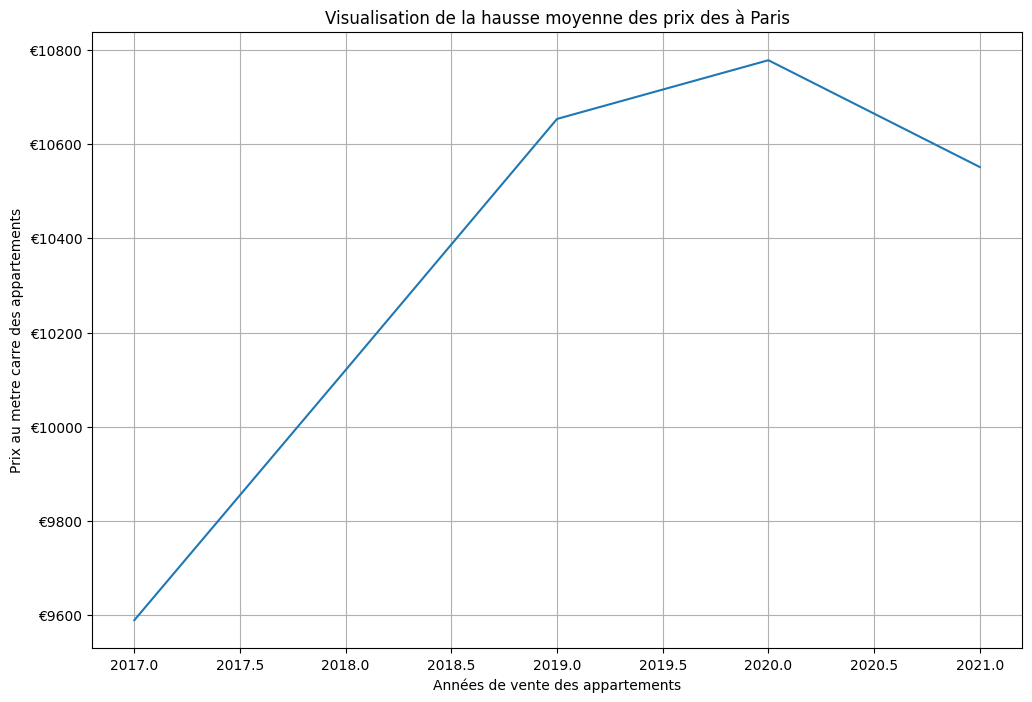

In [ ]:
#Création d'un graphique pour visualiser la hausse de la moyenne des prix
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
plt.figure(figsize=(12,8))
plt.plot(df_immo_annee['annee_mutation'], df_immo_annee['prix_m2'])
plt.xlabel('Années de vente des appartements')
plt.ylabel('Prix au metre carre des appartements')
formatter = ticker.FormatStrFormatter('€%d')
plt.gca().yaxis.set_major_formatter(formatter)
plt.grid()
plt.title('Visualisation de la hausse moyenne des prix des à Paris')
plt.show()

### 6. Différences de prix au metre carré entre les arrondissements

Maintenant nous allons chercher à afficher l'évolution des prix par arrondissement. Vérifions la liste des arrondissements que nous avons dans nos données. Normalement à Paris nous avons 20 codes postaux différents, 1 par arrondissement allant de 75001 à 75020.

In [ ]:
#Liste des codes postaux dans nos données.
df_immo_appart.code_postal.unique()

array([75003, 75008, 75001, 75006, 75005, 75007, 75010, 75009, 75011,
       75012, 75013, 75014, 75015, 75016, 75017, 75018, 75020, 75019,
       75004, 75002])

In [ ]:
#Créeons un dataframe pour une deuxième visualisation avec l'evolution des prix par arrondissement
df_immo_arrond =df_immo_appart
# Grouper par année et calculer la moyenne des colonnes 'valeur_fonciere' et 'surface_reelle'
df_immo_arrond = df_immo_arrond.groupby('code_postal')[['valeur_fonciere', 'surface_reelle']].mean().reset_index()

# Renommer les colonnes
df_immo_arrond = df_immo_arrond.rename(columns={'valeur_fonciere': 'Prix_moyen_vente', 'surface_reelle': 'Surface_moyenne'})

# Afficher le DataFrame résultant
print(df_immo_arrond)

    code_postal  Prix_moyen_vente  Surface_moyenne
0         75001     554648.249715        43.320293
1         75002     460325.138421        39.456456
2         75003     514599.519661        41.197704
3         75004     572361.829686        43.565693
4         75005     459687.781826        37.475271
5         75006     670694.777477        51.000000
6         75007     717567.847925        56.887974
7         75008     730700.160572        66.869427
8         75009     483288.011529        46.185759
9         75010     388866.270084        40.334963
10        75011     364381.183039        36.523810
11        75012     369521.521178        40.136100
12        75013     330892.865875        36.809195
13        75014     392738.985409        40.581731
14        75015     397676.144912        41.294194
15        75016     716756.547025        68.394967
16        75017     466379.343959        46.248192
17        75018     351986.093064        37.234581
18        75019     324079.3382

In [ ]:
df_immo_appart.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24353 entries, 0 to 26195
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   date_mutation    24353 non-null  datetime64[ns]
 1   valeur_fonciere  24353 non-null  float64       
 2   code_postal      24353 non-null  int64         
 3   nom_commune      24353 non-null  object        
 4   code_type_local  24353 non-null  int64         
 5   type_local       24353 non-null  object        
 6   surface_reelle   24353 non-null  int64         
 7   prix_m2          24353 non-null  float64       
 8   annee_mutation   24353 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(4), object(2)
memory usage: 1.9+ MB


In [ ]:
df_immo_appart['annee_mutation'] = df_immo_appart['date_mutation'].dt.year

<ipython-input-22-627f231491e7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_immo_appart['annee_mutation'] = df_immo_appart['date_mutation'].dt.year


In [ ]:
import pandas as pd
# Extraire l'année à partir de la colonne 'date_mutation' et créer une nouvelle colonne 'annee_mutation'
df_immo_appart['annee_mutation'] = df_immo_appart['date_mutation'].dt.year

# Regrouper par 'annee_mutation' et 'code_postal', puis calculer la moyenne de 'valeur_fonciere' et 'surface_reelle'
df_immo_arrond = df_immo_appart.groupby(['annee_mutation', 'code_postal'])[['valeur_fonciere', 'surface_reelle']].apply(lambda x: x.mean()).reset_index()

# Renommer les colonnes
df_immo_arrond = df_immo_arrond.rename(columns={'valeur_fonciere': 'Prix_moyen_vente', 'surface_reelle': 'Surface_moyenne'})

df_immo_arrond['prix_m2'] = df_immo_arrond['Prix_moyen_vente'] / df_immo_arrond['Surface_moyenne']


<ipython-input-23-9198249ec290>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_immo_appart['annee_mutation'] = df_immo_appart['date_mutation'].dt.year


In [ ]:
df_immo_arrond['code_postal'].unique()

array([75001, 75002, 75003, 75004, 75005, 75006, 75007, 75008, 75009,
       75010, 75011, 75012, 75013, 75014, 75015, 75016, 75017, 75018,
       75019, 75020])

In [ ]:
df_immo_arrond1 = df_immo_arrond[df_immo_arrond['code_postal'] == 75001]

print(df_immo_arrond1)

    annee_mutation  code_postal  Prix_moyen_vente  Surface_moyenne  \
0             2017        75001     530392.410096        45.241379   
20            2018        75001     581390.365711        46.010204   
40            2019        75001     454606.244889        34.307692   
60            2020        75001     601204.893337        44.871429   
80            2021        75001     639321.076138        47.777778   

         prix_m2  
0   11723.612723  
20  12636.117951  
40  13250.854672  
60  13398.389855  
80  13381.138803  


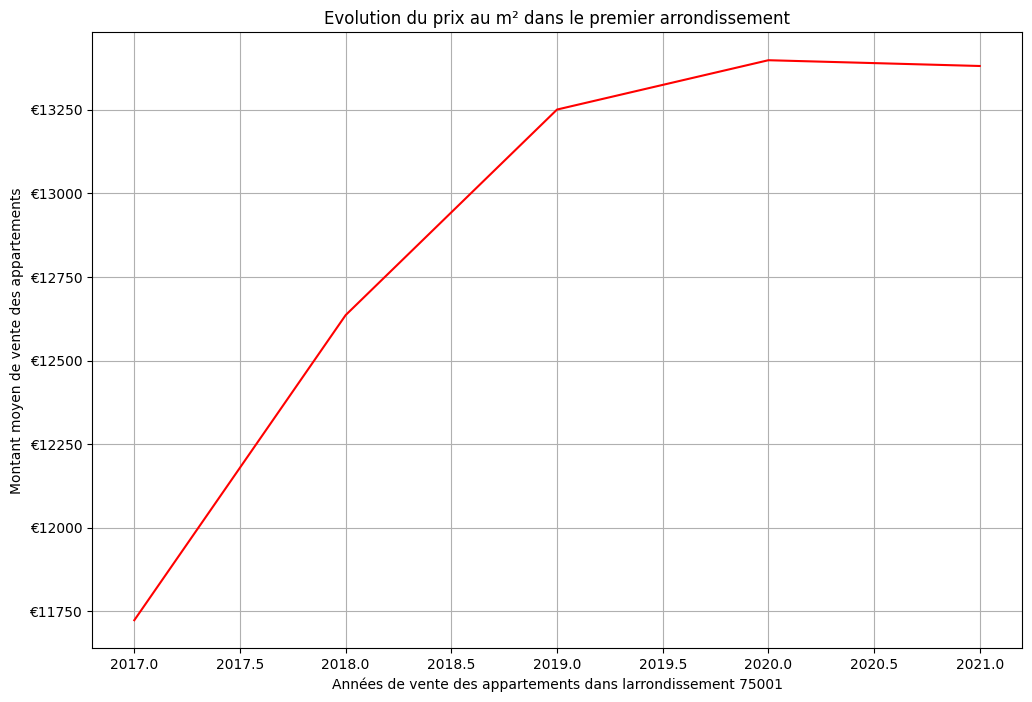

In [ ]:
#Création d'un graphique pour visualiser la hausse de la moyenne des prix au metre carré dans le premier arrondissement
plt.figure(figsize=(12,8))
plt.plot(df_immo_arrond1['annee_mutation'], df_immo_arrond1['prix_m2'],color='red')
plt.xlabel('Années de vente des appartements dans larrondissement 75001')
plt.ylabel('Montant moyen de vente des appartements')
formatter = ticker.FormatStrFormatter('€%d')
plt.gca().yaxis.set_major_formatter(formatter)
plt.grid()
plt.title('Evolution du prix au m² dans le premier arrondissement')
plt.show()

Nous allons ajouter à cette visualisation tous les autres arrondissement avec une couleur différente.

In [ ]:
arrond1=df_immo_arrond[df_immo_arrond['code_postal'] == 75001]
arrond2=df_immo_arrond[df_immo_arrond['code_postal'] == 75002]
arrond3=df_immo_arrond[df_immo_arrond['code_postal'] == 75003]
arrond4=df_immo_arrond[df_immo_arrond['code_postal'] == 75004]
arrond5=df_immo_arrond[df_immo_arrond['code_postal'] == 75005]
arrond6=df_immo_arrond[df_immo_arrond['code_postal'] == 75006]
arrond7=df_immo_arrond[df_immo_arrond['code_postal'] == 75007]
arrond8=df_immo_arrond[df_immo_arrond['code_postal'] == 75008]
arrond9=df_immo_arrond[df_immo_arrond['code_postal'] == 75009]
arrond10=df_immo_arrond[df_immo_arrond['code_postal'] == 75010]
arrond11=df_immo_arrond[df_immo_arrond['code_postal'] == 75011]
arrond12=df_immo_arrond[df_immo_arrond['code_postal'] == 75012]
arrond13=df_immo_arrond[df_immo_arrond['code_postal'] == 75013]
arrond14=df_immo_arrond[df_immo_arrond['code_postal'] == 75014]
arrond15=df_immo_arrond[df_immo_arrond['code_postal'] == 75015]
arrond16=df_immo_arrond[df_immo_arrond['code_postal'] == 75016]
arrond17=df_immo_arrond[df_immo_arrond['code_postal'] == 75017]
arrond18=df_immo_arrond[df_immo_arrond['code_postal'] == 75018]
arrond19=df_immo_arrond[df_immo_arrond['code_postal'] == 75019]
arrond20=df_immo_arrond[df_immo_arrond['code_postal'] == 75020]

In [ ]:
annee_mutation=df_immo_appart['annee_mutation'].unique()

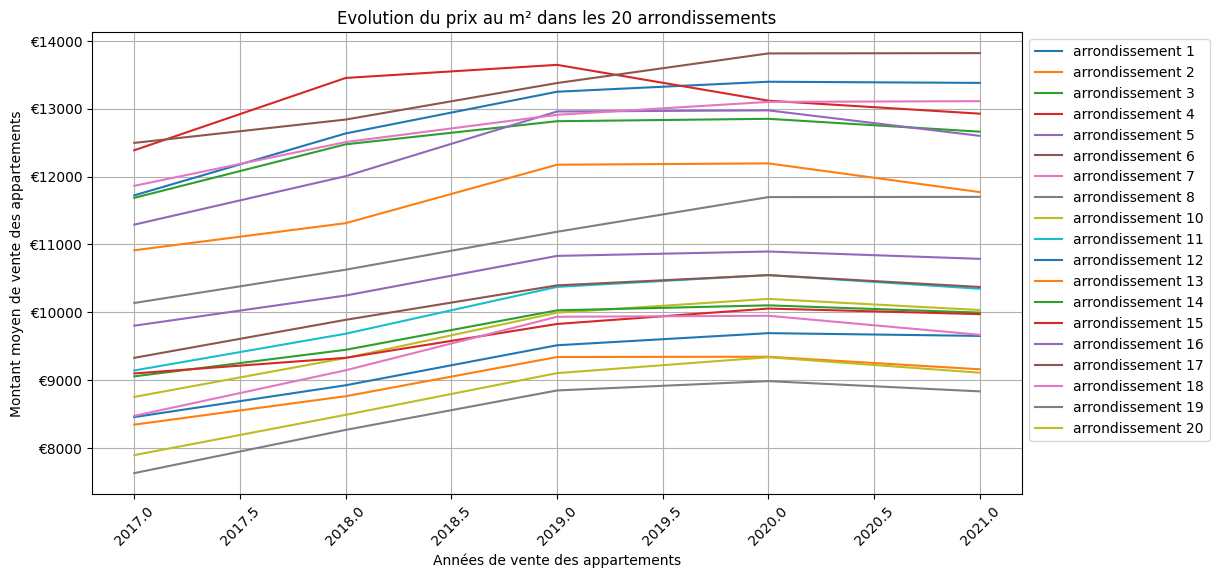

<Figure size 640x480 with 0 Axes>

In [ ]:
#On affiche l'évolution du prix au m² par arrondissement dans Paris
plt.figure(figsize=(12,6))
#Insérer les lignes à tracer de arrondissement 1 à 20
plt.plot(annee_mutation, arrond1['prix_m2'], label='arrondissement 1')
plt.plot(annee_mutation, arrond2['prix_m2'], label='arrondissement 2')
plt.plot(annee_mutation, arrond3['prix_m2'], label='arrondissement 3')
plt.plot(annee_mutation, arrond4['prix_m2'], label='arrondissement 4')
plt.plot(annee_mutation, arrond5['prix_m2'], label='arrondissement 5')
plt.plot(annee_mutation, arrond6['prix_m2'], label='arrondissement 6')
plt.plot(annee_mutation, arrond7['prix_m2'], label='arrondissement 7')
plt.plot(annee_mutation, arrond8['prix_m2'], label='arrondissement 8')
plt.plot(annee_mutation, arrond10['prix_m2'], label='arrondissement 10')
plt.plot(annee_mutation, arrond11['prix_m2'], label='arrondissement 11')
plt.plot(annee_mutation, arrond12['prix_m2'], label='arrondissement 12')
plt.plot(annee_mutation, arrond13['prix_m2'], label='arrondissement 13')
plt.plot(annee_mutation, arrond14['prix_m2'], label='arrondissement 14')
plt.plot(annee_mutation, arrond15['prix_m2'], label='arrondissement 15')
plt.plot(annee_mutation, arrond16['prix_m2'], label='arrondissement 16')
plt.plot(annee_mutation, arrond17['prix_m2'], label='arrondissement 17')
plt.plot(annee_mutation, arrond18['prix_m2'], label='arrondissement 18')
plt.plot(annee_mutation, arrond19['prix_m2'], label='arrondissement 19')
plt.plot(annee_mutation, arrond20['prix_m2'], label='arrondissement 20')
plt.xlabel('Années de vente des appartements')
plt.ylabel('Montant moyen de vente des appartements')
formatter = ticker.FormatStrFormatter('€%d')
plt.gca().yaxis.set_major_formatter(formatter)
plt.grid()
plt.title('Evolution du prix au m² dans les 20 arrondissements')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.xticks(rotation=45)
plt.show()
plt.savefig('evolution_prix_m2_par_arrondissement.png', dpi=300, bbox_inches='tight')

On observe que globalement que ?

### 7. Prix au metre carré par transaction dans un arrondissement

In [ ]:
#Vérifions le nombre de transaction dans le 6ème car le prix semble élevé
transact_arond6=df_immo[df_immo['code_postal'] == 75006]
len(transact_arond6)

782

In [ ]:
dates=transact_arond6['date_mutation']
prix_m2=transact_arond6['prix_m2']

On constate que ?

Affichons l'historique des transactions pour visualiser la dispersion des données :

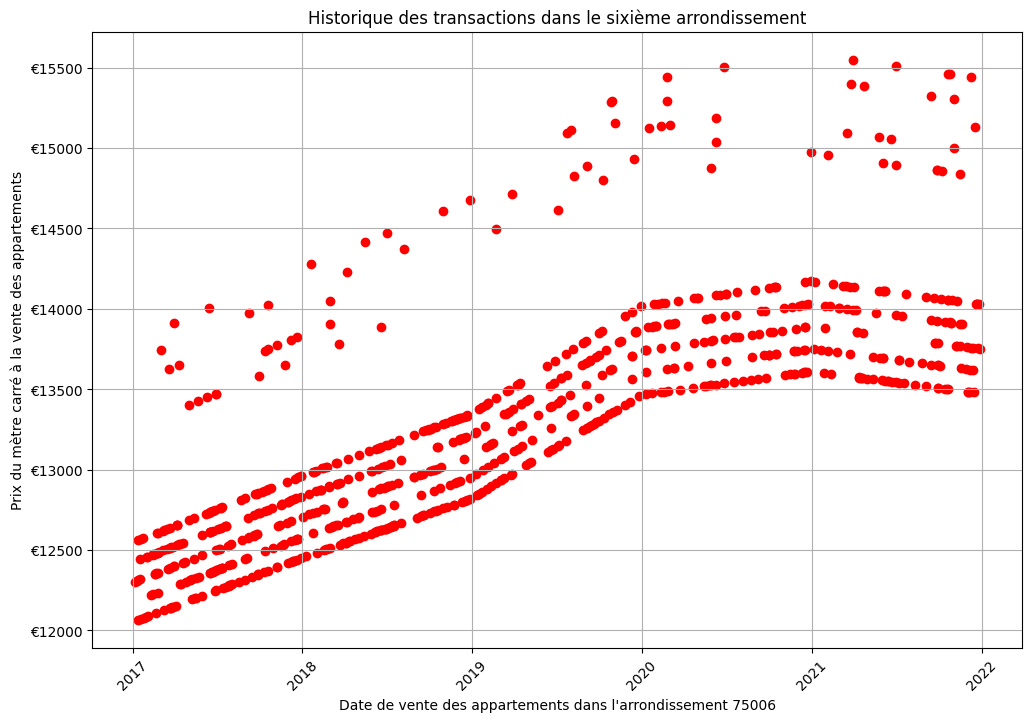

In [ ]:
import matplotlib.ticker as ticker

plt.figure(figsize=(12, 8))

# Utilisation de plt.scatter pour créer le scatter plot
plt.scatter(dates, prix_m2, color='red')

plt.xlabel('Date de vente des appartements dans l\'arrondissement 75006')
plt.ylabel('Prix du mètre carré à la vente des appartements')
formatter = ticker.FormatStrFormatter('€%d')
plt.gca().yaxis.set_major_formatter(formatter)
plt.grid(True)  # Utilisez simplement plt.grid(True) pour afficher la grille
plt.title('Historique des transactions dans le sixième arrondissement')
plt.xticks(rotation=45)

plt.show()



On observe que ?

Pour nous rassurer sur la relation entre les données nous allons utiliser un test statistique de corrélation.

### 8. Vérification de la relation entre le prix au m² et la date dans le 6ème arrondissement par le calcul du coefficient de corrélation de Pearson

Pour cette distribution nous allons calculer le coefficient de corrélation de Pearson. La relation entre le prix au metre carré et la date n'est pas forcément linéaire mais elle s'en rapproche suffisamment pour que cette analyse soit pertinente (voir l'évolution du prix au metre carré globale montrée plus haut, on a presque une droite sauf entre 2020 et 2021). Ce qui nous interesse c'est de prouver que le temps a une influence sur le prix.

In [ ]:
# Conversion de la colonne 'date' en objets datetime
transact_arond6['date_jour'] = pd.to_datetime(transact_arond6['date_mutation'])

# Extraction de l'année de chaque date et stockez-la dans une nouvelle colonne
transact_arond6['annee'] = transact_arond6['date_jour'].dt.year

# Groupement des données par année, puis calcul de nombre total de jours pour chaque année
nbre_jour_annee=transact_arond6.groupby('annee')['date_jour'].count()
prix_m2_sum=transact_arond6.groupby('annee')['prix_m2'].sum()

<ipython-input-100-bd41e26526fa>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  transact_arond6['date_jour'] = pd.to_datetime(transact_arond6['date_mutation'])
<ipython-input-100-bd41e26526fa>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  transact_arond6['annee'] = transact_arond6['date_jour'].dt.year


In [ ]:
#On calcule la corrélation de Spearman
from scipy import stats
# Calculez la corrélation de Spearman
correlation, p_value = stats.spearmanr(prix_m2_sum, nbre_jour_annee)

# Affichez le résultat
print(f"Corrélation de Spearman : {correlation}")
print(f"P-value : {p_value}")

Corrélation de Spearman : 0.9999999999999999
P-value : 1.4042654220543672e-24


Un coefficient de corrélation de 0.99 indiquerait une forte corrélation positive, ce qui signifie que lorsque le nombre jour augmente, le prix au mètre carré augmente également de manière cohérente. Cependant, une p-value de 1.40 n'a généralement pas de sens dans le contexte d'une analyse de corrélation.

### 9. Vérification de la relation entre la valeur fonciere et la surface

In [ ]:
valeur=transact_arond6['valeur_fonciere']
surface=transact_arond6['surface_reelle']

In [ ]:
#On calcule la corrélation de Spearman
from scipy import stats
# Calculez la corrélation de Spearman
correlation, p_value = stats.spearmanr(surface, valeur)

# Affichez le résultat
print(f"Corrélation de Spearman : {correlation}")
print(f"P-value : {p_value}")

Corrélation de Spearman : 0.9968972916468933
P-value : 0.0


Dans votre cas, on a une corrélation de Spearman de 0.99, ce qui est très proche de 1. Cela suggère qu'il existe une relation forte et positive entre les deux variables analysées. La p-value est de 0.0, en général, lorsque la p-value est très faible (typiquement inférieure à 0.05), on considère que la corrélation est statistiquement significative, ce qui suggère que la relation entre les variables n'est pas due au hasard.

### 10. Analyse des locaux industriels, commerciaux et assimilés

In [ ]:
#On crée un dataset qui ne contient que les locaux commerciaux
df_localc=df_immo[df_immo['type_local'] == 'Local industriel. commercial ou assimilé']

In [ ]:
df_localc.head()

,date_mutation,valeur_fonciere,code_postal,nom_commune,code_type_local,type_local,surface_reelle,prix_m2
18,2017-02-01,3.113277e+06,75003,Paris 3e Arrondissement,4,Local industriel. commercial ou assimilé,250,12453.109192
29,2017-02-17,1.164375e+06,75003,Paris 3e Arrondissement,4,Local industriel. commercial ou assimilé,95,12256.581685
34,2017-02-20,3.802522e+05,75003,Paris 3e Arrondissement,4,Local industriel. commercial ou assimilé,31,12266.199603
91,2017-03-09,3.623842e+05,75001,Paris 1er Arrondissement,4,Local industriel. commercial ou assimilé,29,12496.006027
109,2017-03-29,3.159072e+05,75003,Paris 3e Arrondissement,4,Local industriel. commercial ou assimilé,25,12636.289027


In [ ]:
#Préparons un dataframe en regroupant les prix au metre carré moyens des ventes par année

df_localc_annee=df_localc
df_localc_annee['annee_mutation'] = df_localc_annee['date_mutation'].dt.year

# Grouper par année et calculer la moyenne des colonnes 'valeur_fonciere' et 'surface_reelle'
df_localc_annee = df_localc_annee.groupby('annee_mutation')[['valeur_fonciere', 'surface_reelle']].mean().reset_index()
# Renommer les colonnes
df_localc_annee = df_localc_annee.rename(columns={'valeur_fonciere': 'Prix_moyen_vente', 'surface_reelle': 'Surface_moyenne'})

df_localc_annee['prix_m2'] = df_localc_annee['Prix_moyen_vente'] / df_localc_annee['Surface_moyenne']

<ipython-input-39-17f1fe67b26c>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_localc_annee['annee_mutation'] = df_localc_annee['date_mutation'].dt.year


In [ ]:
df_localc_annee.head()

,annee_mutation,Prix_moyen_vente,Surface_moyenne,prix_m2
0,2017,9.654594e+05,89.991404,10728.351893
1,2018,1.003463e+06,88.096866,11390.452590
2,2019,9.928222e+05,82.826389,11986.785474
3,2020,1.034380e+06,85.630952,12079.515992
4,2021,1.129357e+06,92.832000,12165.602125


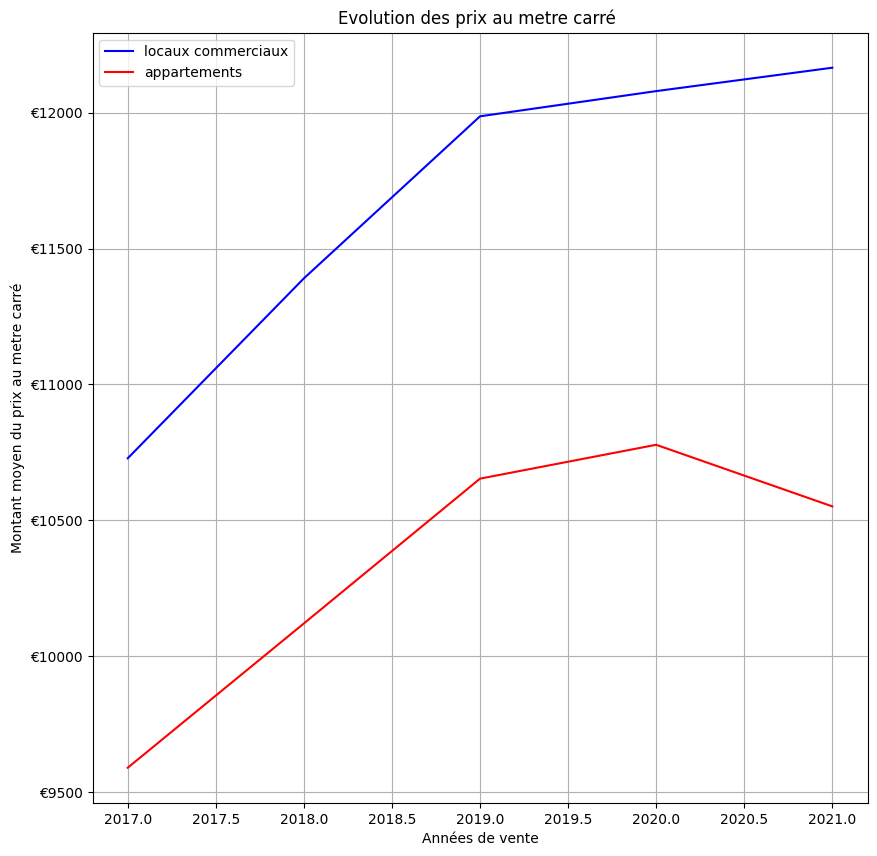

In [ ]:
#Création d'un graphique pour visualiser la hausse de la moyenne des prix
plt.figure(figsize=(10,10))
plt.plot(df_localc_annee['annee_mutation'], df_localc_annee['prix_m2'],label='locaux commerciaux',color='blue')
plt.plot(df_immo_annee['annee_mutation'], df_immo_annee['prix_m2'],label='appartements',color='red')
plt.xlabel('Années de vente')
plt.ylabel('Montant moyen du prix au metre carré')
plt.legend()
formatter = ticker.FormatStrFormatter('€%d')
plt.gca().yaxis.set_major_formatter(formatter)
plt.grid()
plt.title('Evolution des prix au metre carré ')
plt.show()

Le prix au metre carré des locaux commerciaux est ?

Après ces analyses, nous pouvons conclure que les dimensions à utiliser pour prédire le prix au m² sont :
- la surface du bien immobilier,
- la date considérée,
- la localisation (code_postal),
- le type de bien.

# Milestone 2 - Entraînement de l'algorithme

Dans cette section nous allons maintenant entrâiner un algorithme à prédire la valeur fonciere d'un bien immobilier. Pour cela nous allons utiliser l'algorithme de régression linéaire.

On commence par préparer nos données en transformant les colonnes catégoriques du code postal et du type de local grâce au one hot encoder (sklearn) / get_dummies (pandas)

In [ ]:
df_vfonciere = df_immo[['valeur_fonciere','code_postal','type_local','surface_reelle']]

In [ ]:
# Utilisation de get_dummies pour obtenir les colonnes binaires
df_encode = pd.get_dummies(df_vfonciere, columns=['code_postal', 'type_local'], prefix=['cp', 'local'])

On utilise le train_test_split pour prélever un tiers de nos données (33%) et les garder de côté. Nous allons entraîner notre algorithme sur le reste des données et puis mesurer notre erreur moyenne en pourcentage de la valeur foncière

In [ ]:
# On importe le train test split de la librairie sk_learn
from sklearn.model_selection import train_test_split
# Séparez vos données en variables indépendantes (X) et la variable cible (y)
X = df_encode.drop('valeur_fonciere', axis=1)
y = df_encode['valeur_fonciere']
# La valeur y à trouver est la valeur foncière
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
# Créez une instance de modèle de régression linéaire
model = LinearRegression()
# Entraînez le modèle sur l'ensemble d'entraînement
model.fit(X_train, y_train)
# Effectuez des prédictions sur l'ensemble de test
predictions = model.predict(X_test)
# Calcul de l'erreur absolue moyenne (eam)
eam = mean_absolute_error(y_test, predictions)
# Calcul du MPE en pourcentage
emp = (eam / y_test.mean()) * 100
print(f"Erreur moyen en pourcentage: {emp:.2f}%")
r2_erreur=r2_score(y_test,predictions)
print(r2_erreur*100)

Erreur moyen en pourcentage: 7.68%
98.50163229742527


Notre algorithme fait donc 7.68% d'erreur en moyenne sur la prédiction de la valeur foncière.

pour aller plus loin, on a calculé le coefficient de détermination,
R² de 98.50% signifie que notre modèle explique environ 98.50% de la variance totale dans les valeurs foncières. Cela suggère que notre modèle s'ajuste très bien aux données et fait des prédictions très précises.

mais n'oubliez pas de valider votre modèle sur un ensemble de test pour obtenir une évaluation plus complète de ses performances.

# Milestone 3 - Prédiction définitive pour le client

Nous avons récupéré le fichier avec le portefeuille des actifs de la société. Nous allons l'importer puis effectuer la prédiction et statuer sur la branche qui, selon notre prédiction, aura le plus de valeur à la date demandée c'est à dire au 31 décembre 2022.<br>
Petite précision, nous souhaitons continuer à utiliser la surface réelle pour faire les calculs et pas la surface carrez.

In [ ]:
#On importe les données dans un dataframe
df_portflle=pd.read_excel("/gdrive/MyDrive/Colab_notebooks/P8_Analyse_evolution_prix_python/portefeuille_actifs1.xlsx")

In [ ]:
df_portflle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 275 entries, 0 to 274
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   adresse_numero             275 non-null    int64  
 1   adresse_nom_voie           275 non-null    object 
 2   code_postal                275 non-null    int64  
 3   code_commune               275 non-null    int64  
 4   nom_commune                275 non-null    object 
 5   surface_carrez             275 non-null    float64
 6   code_type_local            275 non-null    int64  
 7   type_local                 275 non-null    object 
 8   surface_reelle_bati        275 non-null    int64  
 9   nombre_pieces_principales  275 non-null    int64  
 10  longitude                  275 non-null    float64
 11  latitude                   275 non-null    float64
dtypes: float64(3), int64(6), object(3)
memory usage: 25.9+ KB


In [ ]:
df_portflle = df_portflle[['code_postal', 'type_local', 'surface_reelle_bati']]

In [ ]:
df_portflle= df_portflle.rename(columns={'surface_reelle_bati':'surface_reelle'})
df_portflle.head()

,code_postal,type_local,surface_reelle
0,75001,Appartement,25
1,75003,Appartement,22
2,75003,Appartement,65
3,75008,Appartement,74
4,75008,Appartement,22


Nous avons la liste des biens immobiliers de l'entreprise. Pour effectuer une prédiction, nous devons mettre ce fichier au même format que le dataframe que nous avons utilisé lors de l'entraînement de l'algorithme.

In [ ]:
# Utilisez get_dummies pour obtenir les colonnes binaires
df_encode_prtf = pd.get_dummies(df_portflle, columns=['code_postal', 'type_local'], prefix=['cp', 'local'])
# Vous avez maintenant vos données avec des colonnes binaires

################On importe la librairie datetime pour pouvoir créer une colonne timestamp avec la date du 31 décembre 2022 pour la prédiction
import datetime as dt
#df_encode_prtf['timestamp'] = pd.to_datetime('2022-12-31')

In [ ]:
###############Conversion du dataframe en str
#df_encode_prtf.astype(str)

Notre dataframe est prêt à être utilisé par notre algorithme de prédiction.

In [ ]:
# Prédisez la valeur à la date du 31 décembre 2022
df_encode_prtf['valeur_predite'] = model.predict(df_encode_prtf)

#On vérifie les 10 premières valeurs

In [ ]:
df_encode_prtf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 275 entries, 0 to 274
Data columns (total 24 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   surface_reelle                                  275 non-null    int64  
 1   cp_75001                                        275 non-null    uint8  
 2   cp_75002                                        275 non-null    uint8  
 3   cp_75003                                        275 non-null    uint8  
 4   cp_75004                                        275 non-null    uint8  
 5   cp_75005                                        275 non-null    uint8  
 6   cp_75006                                        275 non-null    uint8  
 7   cp_75007                                        275 non-null    uint8  
 8   cp_75008                                        275 non-null    uint8  
 9   cp_75009                                   

Maintenant nous allons comparer la valorisation prédite pour les deux segments.

In [ ]:
#Valorisation du portefeuille sur le segment des particuliers
# Séparez les données prédites pour les deux segments (appartement et local commercial)
appartement_prediction = df_encode_prtf[df_encode_prtf['local_Appartement'] == 1]['valeur_predite']

# Comparez les valeurs prédites pour les deux segments
sum_appartement_predict = appartement_prediction.sum()

print(f"La valorisation du segment des appartements est (en millions d'euros): {sum_appartement_predict / 1000000:.2f} millions d'euros")

La valorisation du segment des appartements est (en millions d'euros): 63.16 millions d'euros


In [ ]:
#Valorisation du portefeuille sur le segment corporate
industriel_prediction=df_encode_prtf[df_encode_prtf['local_Local industriel. commercial ou assimilé'] == 1]['valeur_predite']
sum_industriel_predict= industriel_prediction.sum()

print(f"La valorisation du segment des local industriel. commercial est (en millions d'euros): {sum_industriel_predict / 1000000:.2f} millions d'euros")

La valorisation du segment des local industriel. commercial est (en millions d'euros): 91.93 millions d'euros


Mes conclusions sur le segment avec la plus grande valorisation et sur les limites de cette estimation :
- Au regard de la somme de valeurs prédites, c'est le segment Local industriel. commercial ou assimilé qui la plus grande valeur dont 91.93 millions d'euros soit un écart de 28,77 millions d'euros.
- La limite de cette estimation est qu'elle basée sur un seul facteur prix/m2.   Il y'a une marge d'erreur environ 7% environ dans le model de prédiction

# Milestone 4 - Classification des données issues du jeu de test

Dans cette partie nous allons labelliser automatiquement les biens immobiliers comme étant :
- soit des Appartements
- soit des Local industriel. commercial ou assimilé
Pour cela nous allons utiliser l'algorithme du KMeans sur le jeu de données partagé par l'entreprise.

Pour que l'algorithme fonctionne, il faut que nous préparions les données en supprimant les dimensions inutiles et en nous concentrant sur le facteur discriminant entre les appartements et les locaux commerciaux : la différence dans le prix au mètre carré tel que nous l'avons vu avant.

In [ ]:
#On importe les données dans un dataframe
df_echant=pd.read_excel("/gdrive/MyDrive/Colab_notebooks/P8_Analyse_evolution_prix_python/echantillon.xlsx")

In [ ]:
df_echant.head()

,valeur_fonciere,code_postal,nom_commune,surface_reelle
0,868687.083271,75019,Paris 19e Arrondissement,88
1,452050.762192,75019,Paris 19e Arrondissement,45
2,193088.653587,75019,Paris 19e Arrondissement,21
3,303012.549370,75019,Paris 19e Arrondissement,32
4,149272.200110,75019,Paris 19e Arrondissement,20


On applique les transformations nécessaires. Tout d'abord nous allons calculer le prix au mètre carré en divisant la valeur foncière par la surface. Ensuite nous allons retirer ces colonnes car nous avons déjà l'information qu'elles contiennent dans la dimension prix au mètre carré désormais.

Enfin toutes nos données sont de l'année 2021. Nous allons retirer cette dimension qui ne devrait pas être discriminante dans le regroupement des données.

In [ ]:
df_echant['prix_m2']=df_echant['valeur_fonciere']/df_echant['surface_reelle']

In [ ]:
df_echant.drop(['valeur_fonciere','nom_commune','surface_reelle'], axis=1, inplace=True )

In [ ]:
df_echant.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   code_postal  40 non-null     int64  
 1   prix_m2      40 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 768.0 bytes


#Identification de nombre de K
Pour déterminer le nombre optimal de clusters lors de la classification de données de prix par mètre carré, on a privilegier l'utiliser de la méthode du coude

In [ ]:
x=df_echant['prix_m2'].values.reshape(-1, 1)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

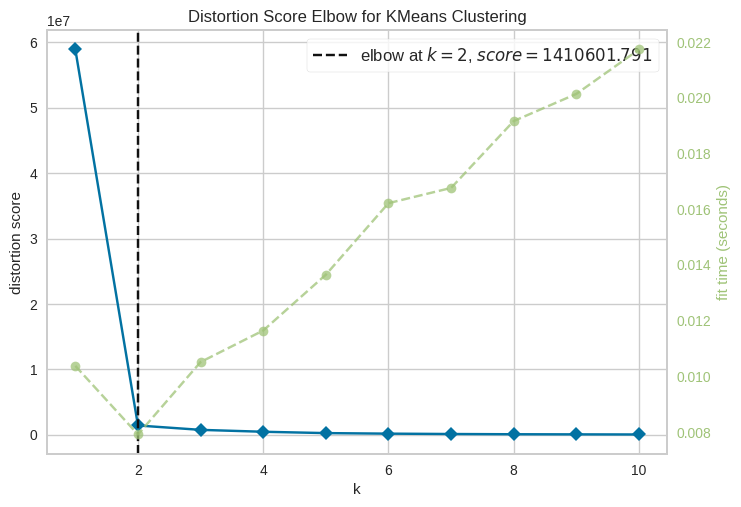

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
# Créez l'estimateur KMeans et l'objet KElbowVisualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1, 11))
# Ajustez le modèle KMeans sur vos données
visualizer.fit(x)
visualizer.show()



Au regard du profil obtenu du méthode de coude le meilleur k correspond à 2. C'est ce que nous allons utiliser l'algorithme du Kmeans qui va rechercher 2 centroïdes à travers les données.

In [ ]:
from sklearn.cluster import KMeans

# Sélectionnez les colonnes pertinentes pour la classification
X=df_echant

# Choisissez le nombre de clusters (K) que vous souhaitez créer
k = 2  # Vous pouvez ajuster cette valeur en fonction de vos besoins

# Créez un modèle K-Means
kmeans = KMeans(n_clusters=k)

# Ajustez le modèle aux données
kmeans.fit(X)
# Obtenez les étiquettes de cluster pour chaque point de données
labels = kmeans.predict(X)
# Ajoutez les étiquettes de cluster au DataFrame d'origine
df_echant['cluster'] =labels

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
# On vérifie les données de la prédiction
df_echant.head()

,code_postal,prix_m2,cluster
0,75019,9871.444128,0
1,75019,10045.572493,0
2,75019,9194.697790,0
3,75019,9469.142168,0
4,75019,7463.610005,1


In [ ]:
df_echant['cluster'] = df_echant['cluster'].replace({0: 'Local industriel commercial ou assimilé', 1: 'Appartement'})

Nous avons obtenu notre prédiction. Nous pouvons changer les labels et remplacer les valeurs à 0 par Local industriel. commercial ou assimilé et les valeurs à +1 par Appartement.

In [ ]:
#On affiche les résultats
df_echant.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   code_postal  40 non-null     int64  
 1   prix_m2      40 non-null     float64
 2   cluster      40 non-null     object 
dtypes: float64(1), int64(1), object(1)
memory usage: 1.1+ KB


# Milestone 5 - Analyse et présentation des résultats

In [ ]:
df_label_correct=df_echant=pd.read_excel("/gdrive/MyDrive/Colab_notebooks/P8_Analyse_evolution_prix_python/echantillon_a_classer_solution.xlsx")

In [ ]:
df_label_correct['prix_m2']=df_label_correct['valeur_fonciere']/df_label_correct['surface_reelle']

In [ ]:
df_label_correct.groupby('type_local')['prix_m2'].agg(['mean', 'min', 'max'])

,mean,min,max
type_local,,,
Appartement,7408.775030,7207.21763,7666.071700
Local industriel. commercial ou assimilé,9806.924674,9194.69779,10113.195822


In [ ]:
df_echant.groupby('cluster')['prix_m2'].agg(['mean', 'min', 'max'])

,mean,min,max
cluster,,,
Appartement,7408.775030,7207.21763,7666.071700
Local industriel commercial ou assimilé,9806.924674,9194.69779,10113.195822


### Mes conclusions sur l'analyse et les limites de l'exercice :

Au regard de la similarité entre l'analyse du resultat de la classification par le modele Kmeans et celle de labellisations correctes des biens immobiliers, on peut dire que les résultats sont satifaisants.
Cependant, nous pouvons évaluer la qualité d'une solution de clustering K-Means en utilisant différentes métriques, telles que le score de Silhouette ou l'index Davies-Bouldin, pour évaluer la façon dont les points de données sont groupés en clusters. Ces mesures fournissent des informations sur la cohésion et la séparation des clusters, qui peuvent vous donner une idée de la qualité de K-Means dans la création de clusters pour nos données. Plus le score de Silhouette est élevé et plus le Davies-Bouldin Index est bas, meilleure est la solution de regroupement.